In [1]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import synth_gen

In [2]:
import sys
sys.path.append("../twintest")

import causality as intest
import viz

In [29]:
target = 1 # By defaul X->Y
nb_samples = 100

Nx = {
    'name': 'uniform',
    'var': 10
}

Ny = {
    'name': 'normal',
    'var': 10#4.87 
    # 4.86 - 87 - 88
}


f = lambda x:  .5*( 7*np.tanh(x) + 4*np.sin(x)+ x + x ** 2 + .1 *x**3)

In [30]:
binary_am = synth_gen.BinaryAM(Nx, Ny, f, nb_samples)
x = binary_am.x.reshape(-1, 1)
y = binary_am.y

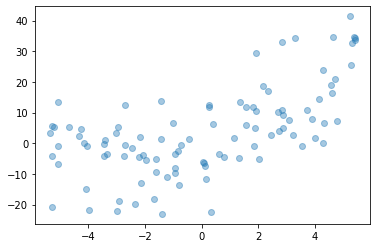

In [31]:
viz.pretty_scatter(x, y)

In [32]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel

In [39]:
# Define kernel parameters. 
l = .01
sigma_f = 2

# Define kernel object. 
kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2, 1e2)) \
            * RBF(length_scale=l, length_scale_bounds=(1e-2, 1e2)) \
            + WhiteKernel(noise_level=100, noise_level_bounds=(1e-10, 1e+1))

In [40]:
clf = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0)
clf.fit(x, y)

GaussianProcessRegressor(alpha=0, copy_X_train=True,
                         kernel=1.41**2 * RBF(length_scale=0.01) + WhiteKernel(noise_level=100),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

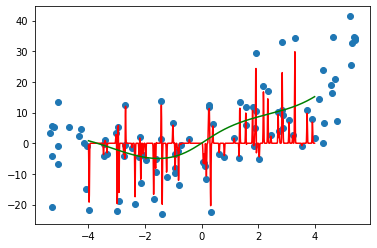

In [41]:
x_linspace = np.atleast_2d(np.linspace(-4, 4, 1000)).T
y_pred = clf.predict(x_linspace)

plt.plot(x_linspace, y_pred, c='r')
plt.plot(x_linspace, f(x_linspace), c='g')
plt.scatter(x, y)